In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Pre-processing**

In [3]:
path = "C:/Users/Usuario/Desktop/UAB/Tercer/2n cuatri/Synthesis project/GraphAnomaly"

In [4]:
df_classes = pd.read_csv(path+'/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
df_edges = pd.read_csv(path+'/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
df_features = pd.read_csv(path+'/elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)

In [5]:
# Change column names of df_features
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

df_features = df_features.rename(columns=colNames)

In [6]:
# Pass unknown to number 3
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
print('Label 1 belongs to illicit transactions, label 2 to licit transactions and label 3 to unknown transactions.\n')
print('Shape of classes', df_classes.shape)
print('Shape of edges', df_edges.shape)
print('Shape of features', df_features.shape)

Label 1 belongs to illicit transactions, label 2 to licit transactions and label 3 to unknown transactions.

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


In [8]:
# Merge the DataFrames on the column 'source', assuming it's the same name in both DataFrames
df_merged = pd.merge(df_features, df_classes, on='txId', how='left')
df_merged['class'] = df_merged['class'].replace({'1': 1, '2': 2})
df_merged

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26092\175460445.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['class'] = df_merged['class'].replace({'1': 1, '2': 2})


,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
203765,158577750,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,3
203766,158375402,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203767,158654197,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,3


In [56]:
df_labeled_extended = pd.read_csv(path+'/labeled_extended.csv')
df_labeled_extended.drop(columns=["Time step"])
df_labeled_extended

,Unnamed: 0,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class,degree,degree_centrality,betweenness_centrality,eigenvector_centrality,closeness_centrality,clustering_coefficient
0,3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,0.677799,-0.120613,-0.119792,2,232438397.0,232438397.0,232438397.0,232438397.0,232438397.0,232438397.0
1,9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,0.333211,-0.120613,-0.119792,2,232029206.0,232029206.0,232029206.0,232029206.0,232029206.0,232029206.0
2,10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.097524,-0.120613,-0.119792,2,232344069.0,232344069.0,232344069.0,232344069.0,232344069.0,232344069.0
3,11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.097524,-0.120613,-0.119792,2,27553029.0,27553029.0,27553029.0,27553029.0,27553029.0,27553029.0
4,16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.054450,-1.760926,-1.760984,2,3881097.0,3881097.0,3881097.0,3881097.0,3881097.0,3881097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46559,203752,80329479,49,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,...,3.707301,-1.390548,-1.214035,2,80329479.0,80329479.0,80329479.0,80329479.0,80329479.0,80329479.0
46560,203754,158406298,49,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,...,7.914145,-0.120613,-0.119792,2,158406298.0,158406298.0,158406298.0,158406298.0,158406298.0,158406298.0
46561,203759,158375075,49,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,...,-0.097524,-0.120613,-0.119792,1,158375075.0,158375075.0,158375075.0,158375075.0,158375075.0,158375075.0
46562,203763,147478192,49,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.097524,-0.120613,-0.119792,2,147478192.0,147478192.0,147478192.0,147478192.0,147478192.0,147478192.0


##### **Training models**

In [9]:
class machineLearning:
    def __init__(self, df, balancing = True):
        self.df = df
        self.results = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 score"])
        
        
    def balancing_dataset(self, technique, display_counts = False):
        balancing_df = self.df[self.df['class'] != 3]
        if technique == 'down-sample':
            balanced_df = balancing_df.groupby('class', group_keys=False).apply(lambda x: x.sample(int(len(balancing_df)*0.097608), random_state=69))
            
        elif technique == 'smote':
            X = balancing_df.loc[balancing_df['class'].isin([1, 2])].drop(columns=['txId', 'class'])
            y = balancing_df.loc[balancing_df['class'].isin([1, 2])]['class']
            
            smote = SMOTE(random_state=42)
            X_smote, y_smote = smote.fit_resample(X, y)
            balanced_df = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['class'])], axis=1)
            
            
        if display_counts:
            print(balanced_df['class'].value_counts())
        
        
        return balanced_df
   
    def apply_PCA(self, df, ncomponents):
        # Standardize the features (important for PCA)
        scaler = StandardScaler()

        df_pca = df.drop(columns=['class'])
        scaled_data = scaler.fit_transform(df_pca)

        # Apply PCA
        pca = PCA(n_components=ncomponents)  # You can choose the number of components you want to keep
        principal_components = pca.fit_transform(scaled_data)

        # Create a DataFrame for the principal components
        columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
        principal_df = pd.DataFrame(data=principal_components, columns=columns)


        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance_ratio = explained_variance_ratio.sum()

        print(f"\nExplained variance ratio: {cumulative_variance_ratio}")
        print(f"Data reduction, from shape {df_pca.shape} to {principal_df.shape}")
        
        # Add two columns to be able to apply ML models later on
        principal_df['txId'] = df_pca.index
        principal_df['class'] = list(df['class'])
        
        return principal_df
    
    
    def train_and_test(self, df_PCA, algorithm, display_conf_matrix=False):
        X = df_PCA.loc[df_PCA['class'].isin([1, 2])].drop(columns=['class'])
        y = df_PCA.loc[df_PCA['class'].isin([1, 2])]['class']
        # print(set(list(principal_df.loc[principal_df['class'].isin(['1', '2'])]['class'])))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        print(f"\nTraining {algorithm}...\n")
        try:
            if algorithm == "Logistic regression":
                model = LogisticRegression()
                
            elif algorithm == "Random forest":
                model = RandomForestClassifier()
                
            elif algorithm == "SVM":
                model = SVC()
            
            elif algorithm == "Decision tree":
                model = DecisionTreeClassifier()
            
        except:
            return "Error! No machine learning model chosen."
        
        
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        
        print(f"Testing {algorithm}...\n")
        accuracy = round(accuracy_score(y_test, y_pred), 2)
        print("Accuracy: {:.2f}%".format(accuracy * 100))
        
        precision = round(precision_score(y_test, y_pred, pos_label=1), 2)
        print("Precision: {:.2f}%".format(precision * 100))
        
        recall = round(recall_score(y_test, y_pred, pos_label=1), 2)
        print("Recall: {:.2f}%".format(recall * 100))
        
        f1 = round(f1_score(y_test, y_pred, pos_label=1),2)
        print("F1 Score: {:.2f}%".format(f1 * 100))
        
        self.results.loc[len(self.results)] = [algorithm, accuracy, precision, recall, f1]
        
        if display_conf_matrix:
            cm = confusion_matrix(y_test, y_pred, labels=[1, 2])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
            disp.plot()
            plt.title(algorithm)
            plt.show()


            # conf_matrix = confusion_matrix(y_test, y_pred)
            # plt.figure(figsize=(8, 6))
            # sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            #             xticklabels=model.classes_, 
            #             yticklabels=model.classes_)
            # plt.xlabel('Predicted Labels')
            # plt.ylabel('True Labels')
            # plt.title(f'Confusion Matrix for {algorithm}')
            # plt.show()
    
    def get_results(self):
        return self.results

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30096\1708954974.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = balancing_df.groupby('class', group_keys=False).apply(lambda x: x.sample(int(len(balancing_df)*0.097608), random_state=69))


class
1    4545
2    4545
Name: count, dtype: int64

Explained variance ratio: 0.9984642296868521
Data reduction, from shape (9090, 167) to (9090, 100)

Training Decision tree...

Testing Decision tree...

Accuracy: 89.00%
Precision: 89.00%
Recall: 89.00%
F1 Score: 89.00%


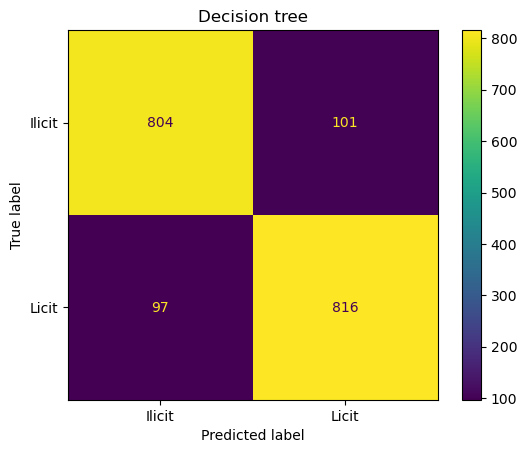


Training Random forest...

Testing Random forest...

Accuracy: 92.00%
Precision: 98.00%
Recall: 86.00%
F1 Score: 92.00%


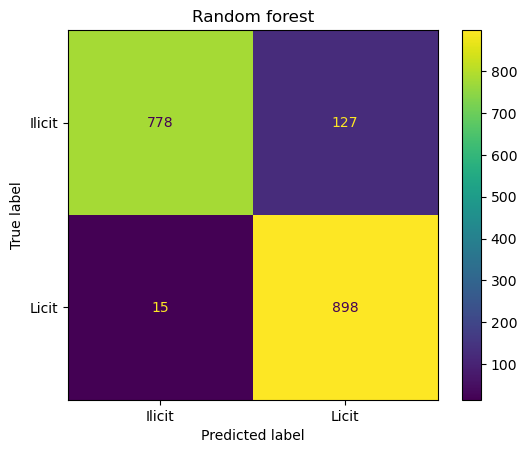


Training SVM...

Testing SVM...

Accuracy: 65.00%
Precision: 62.00%
Recall: 74.00%
F1 Score: 68.00%


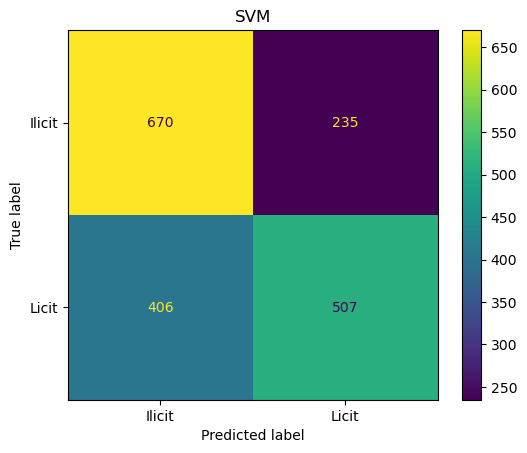

,Classifier,Accuracy,Precision,Recall,F1 score
0,Decision tree,0.89,0.89,0.89,0.89
1,Random forest,0.92,0.98,0.86,0.92
2,SVM,0.65,0.62,0.74,0.68


In [51]:
# Create the instance
down_sample = machineLearning(df_merged)

# Pre-process
df_balanced = down_sample.balancing_dataset(technique='down-sample', display_counts=True)
pca_df = down_sample.apply_PCA(df_balanced, 100)

methods = ["Decision tree", "Random forest", "SVM"]

# Train
for method in methods:
    down_sample.train_and_test(pca_df, method, display_conf_matrix=True)
    

# Obtain the results and store them
results_down_sample = down_sample.get_results()
display(results_down_sample)
results_down_sample.to_csv('results_down_sample.csv')

class
2    42019
1    42019
Name: count, dtype: int64

Explained variance ratio: 0.9985493259039685
Data reduction, from shape (84038, 166) to (84038, 100)

Training Decision tree...

Testing Decision tree...

Accuracy: 97.00%
Precision: 97.00%
Recall: 98.00%
F1 Score: 97.00%


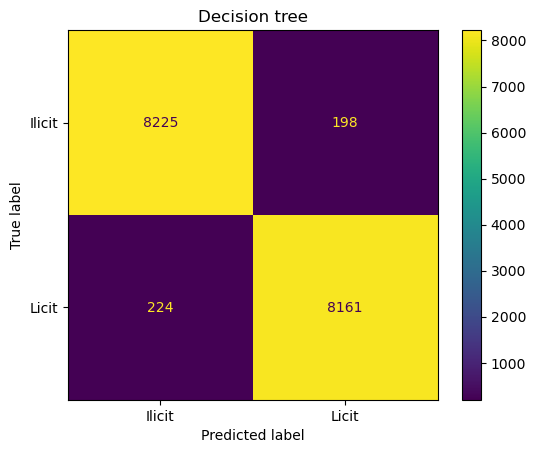


Training Random forest...

Testing Random forest...

Accuracy: 99.00%
Precision: 100.00%
Recall: 98.00%
F1 Score: 99.00%


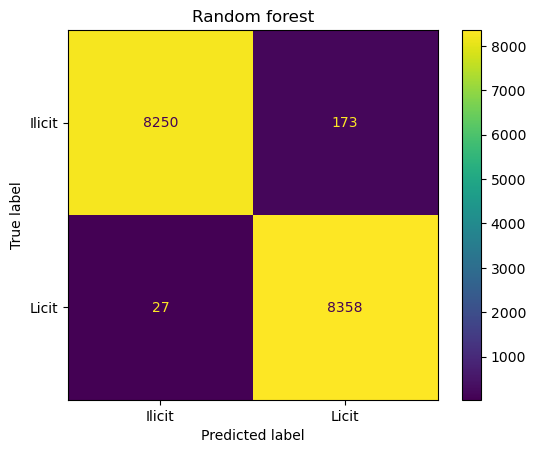


Training SVM...

Testing SVM...

Accuracy: 95.00%
Precision: 100.00%
Recall: 90.00%
F1 Score: 94.00%


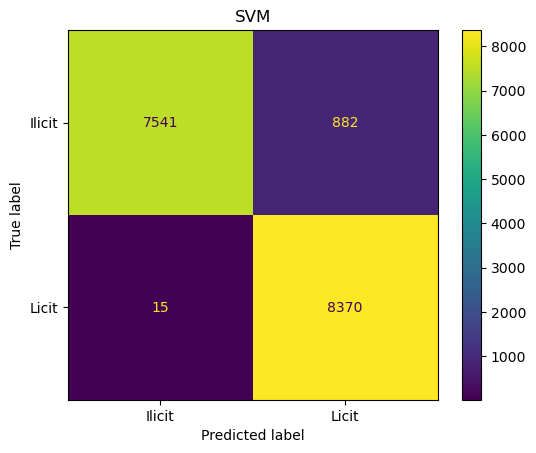

,Classifier,Accuracy,Precision,Recall,F1 score
0,Decision tree,0.97,0.97,0.98,0.97
1,Random forest,0.99,1.00,0.98,0.99
2,SVM,0.95,1.00,0.90,0.94


In [11]:
# Create the instance
smote_df = machineLearning(df_merged)

# Pre-process
df_balanced = smote_df.balancing_dataset(technique='smote', display_counts=True)
pca_df = smote_df.apply_PCA(df_balanced, 100)

methods = ["Decision tree", "Random forest", "SVM"]

# Train
for method in methods:
    smote_df.train_and_test(pca_df, method, display_conf_matrix=True)
    

results_smote = smote_df.get_results()
display(results_smote)
results_smote.to_csv('results_smote.csv')

Train and test sets separated

In [15]:
train_set = pd.read_csv(path+'/train_set.csv')
test_set = pd.read_csv(path+'/test_set.csv')

In [25]:
class machineLearning2:
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set
        self.results = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 score"])
   
    def apply_PCA(self, ncomponents):
        # Standardize the features (important for PCA)
        scaler = StandardScaler()

        df_pca = self.train_set.drop(columns=['class'])
        scaled_data = scaler.fit_transform(df_pca)

        # Apply PCA
        pca = PCA(n_components=ncomponents)  # You can choose the number of components you want to keep
        principal_components = pca.fit_transform(scaled_data)

        # Create a DataFrame for the principal components
        columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
        principal_df = pd.DataFrame(data=principal_components, columns=columns)


        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance_ratio = explained_variance_ratio.sum()

        print(f"\nExplained variance ratio: {cumulative_variance_ratio}")
        print(f"Data reduction, from shape {df_pca.shape} to {principal_df.shape}")
        
        # Add two columns to be able to apply ML models later on
        principal_df['txId'] = df_pca.index
        principal_df['class'] = list(self.train_set['class'])
        
        return principal_df
    
    
    def train_and_test(self, algorithm, display_conf_matrix=False):
        X_train = self.train_set.loc[self.train_set['class'].isin([1, 2])].drop(columns=['class'])
        y_train = self.train_set.loc[self.train_set['class'].isin([1, 2])]['class']
        
        X_test = self.test_set.loc[self.test_set['class'].isin([1, 2])].drop(columns=['class'])
        y_test = self.test_set.loc[self.test_set['class'].isin([1, 2])]['class']
        
        print(f"\nTraining {algorithm}...\n")
        try:
            if algorithm == "Logistic regression":
                model = LogisticRegression()
                
            elif algorithm == "Random forest":
                model = RandomForestClassifier()
                
            elif algorithm == "SVM":
                model = SVC()
            
            elif algorithm == "Decision tree":
                model = DecisionTreeClassifier()
            
        except:
            return "Error! No machine learning model chosen."
        
        
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        
        print(f"Testing {algorithm}...\n")
        accuracy = round(accuracy_score(y_test, y_pred), 2)
        print("Accuracy: {:.2f}%".format(accuracy * 100))
        
        precision = round(precision_score(y_test, y_pred, pos_label=1), 2)
        print("Precision: {:.2f}%".format(precision * 100))
        
        recall = round(recall_score(y_test, y_pred, pos_label=1), 2)
        print("Recall: {:.2f}%".format(recall * 100))
        
        f1 = round(f1_score(y_test, y_pred, pos_label=1),2)
        print("F1 Score: {:.2f}%".format(f1 * 100))
        
        self.results.loc[len(self.results)] = [algorithm, accuracy, precision, recall, f1]
        
        if display_conf_matrix:
            cm = confusion_matrix(y_test, y_pred, labels=[1, 2])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
            disp.plot()
            plt.title(algorithm)
            plt.show()


            # conf_matrix = confusion_matrix(y_test, y_pred)
            # plt.figure(figsize=(8, 6))
            # sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            #             xticklabels=model.classes_, 
            #             yticklabels=model.classes_)
            # plt.xlabel('Predicted Labels')
            # plt.ylabel('True Labels')
            # plt.title(f'Confusion Matrix for {algorithm}')
            # plt.show()
    
    def get_results(self):
        return self.results


Training Decision tree...

Testing Decision tree...

Accuracy: 96.00%
Precision: 91.00%
Recall: 90.00%
F1 Score: 91.00%


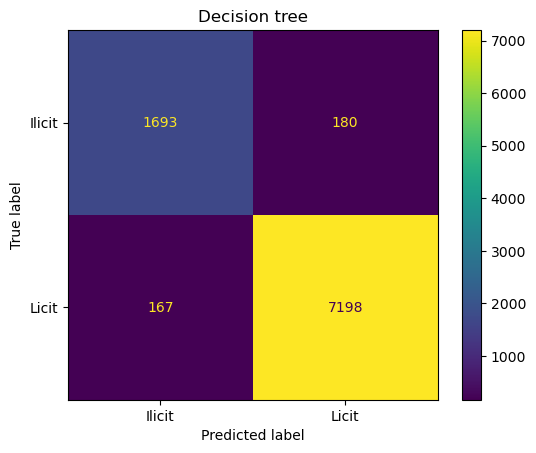


Training Random forest...

Testing Random forest...

Accuracy: 98.00%
Precision: 99.00%
Recall: 92.00%
F1 Score: 96.00%


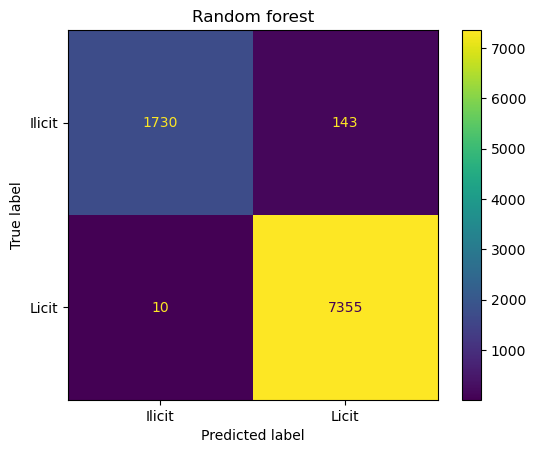


Training SVM...

Testing SVM...

Accuracy: 80.00%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


c:\Users\Usuario\anaconda3\envs\graph-anomaly-myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


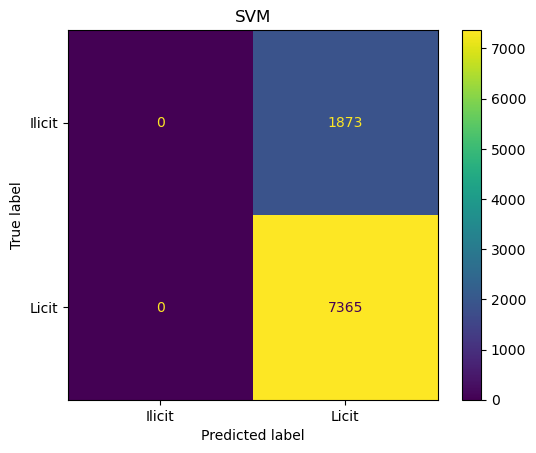

,Classifier,Accuracy,Precision,Recall,F1 score
0,Decision tree,0.96,0.91,0.90,0.91
1,Random forest,0.98,0.99,0.92,0.96
2,SVM,0.80,0.00,0.00,0.00


In [28]:
# Create the instance
ml_instance = machineLearning2(train_set, test_set)

methods = ["Decision tree", "Random forest", "SVM"]

# Train
for method in methods:
    ml_instance.train_and_test(algorithm=method, display_conf_matrix=True)
    

final_results_down_sample = ml_instance.get_results()
display(final_results_down_sample)
final_results_down_sample.to_csv('final_results_down_sample.csv')